In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/full-data-set/subject_1321.xlsx
/kaggle/input/full-data-set/subject_1432.xlsx
/kaggle/input/full-data-set/subject_1321.csv
/kaggle/input/full-data-set/subject_1232.csv
/kaggle/input/full-data-set/VO2_CSV.csv
/kaggle/input/full-data-set/subject_1232.xlsx
/kaggle/input/full-data-set/subject_1432.csv
/kaggle/input/full-data-set/subject_1523.csv
/kaggle/input/full-data-set/VO2_excel.xlsx
/kaggle/input/full-data-set/subject_1523.xlsx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../input/full-data-set/subject_1321.csv', header=[0], skiprows=[1,2,3])


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TIME     54 non-null     float64
 1   VO2      54 non-null     float64
 2   VO2/kg   54 non-null     float64
 3   METS     54 non-null     float64
 4   VCO2     54 non-null     float64
 5   VE       54 non-null     float64
 6   RER      54 non-null     float64
 7   RR       54 non-null     float64
 8   Vt       54 non-null     float64
 9   FEO2     54 non-null     float64
 10  FECO2    54 non-null     float64
 11  HR       54 non-null     float64
 12  VE/      54 non-null     float64
 13  VE/.1    54 non-null     float64
 14  PetCO2   54 non-null     float64
 15  Power    51 non-null     float64
 16  Lactate  8 non-null      object 
dtypes: float64(16), object(1)
memory usage: 7.3+ KB


In [4]:
### Renaming Columns

df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TIME     54 non-null     float64
 1   VO2      54 non-null     float64
 2   VO2/kg   54 non-null     float64
 3   METS     54 non-null     float64
 4   VCO2     54 non-null     float64
 5   VE       54 non-null     float64
 6   RER      54 non-null     float64
 7   RR       54 non-null     float64
 8   Vt       54 non-null     float64
 9   FEO2     54 non-null     float64
 10  FECO2    54 non-null     float64
 11  HR       54 non-null     float64
 12  VE/VO2   54 non-null     float64
 13  VE/VCO2  54 non-null     float64
 14  PetCO2   54 non-null     float64
 15  Power    51 non-null     float64
 16  Lactate  8 non-null      object 
dtypes: float64(16), object(1)
memory usage: 7.3+ KB


In [5]:
### Simplifying Variables

x = df['TIME']
y = df['VO2']
y1 = df['VE']

In [6]:
### Finding VO2 Max

ymax = max(y)
xmax = x[y.argmax()]

**The frame for the plot**

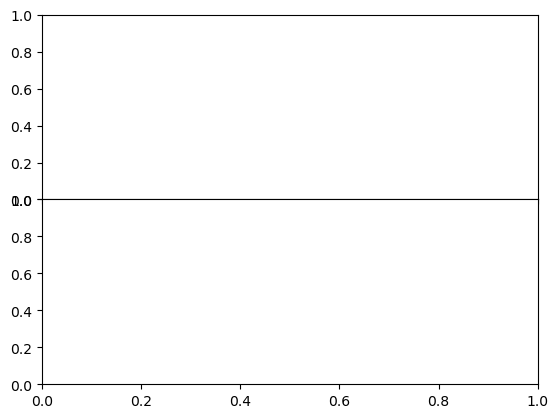

In [7]:
fig, ax = plt.subplots(2, 1, sharex=True)

# create 2 subplots share x axis, in the next line we will remove 
fig.subplots_adjust(hspace=0)

In [8]:
### VO2 Dot Annotation

ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

Text(27.362507, 3.778085, '$\\dot VO_2max$ =(2.78) L/min')

**Main Plot**

In [9]:
### First Plot

ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)

ax[0].set(ylabel=('L/min'))
ax[0].legend()

In [10]:
### Second Plot

ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()

In [11]:
### Naming File

fig.savefig("VO2_Graph", dpi=300, bbox_inches = "tight")

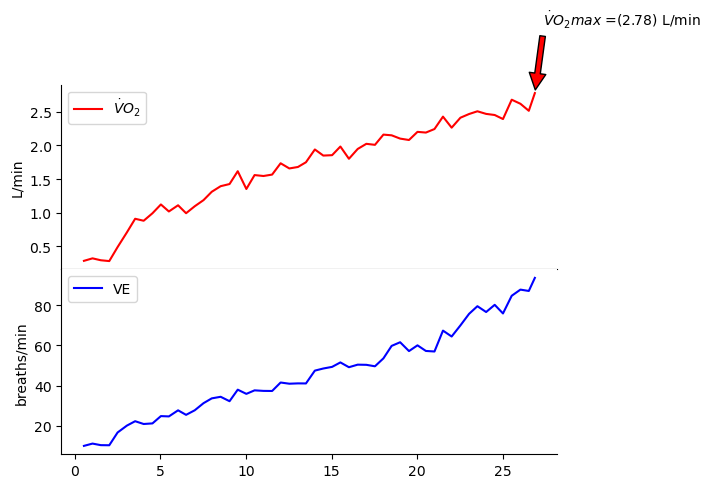

In [12]:
### Putting Plot Code Together

fig, ax = plt.subplots(2, 1, sharex=True)

fig.subplots_adjust(hspace=0)
ax[0].annotate('$\dot VO_2max$ =({}) L/min'.format(round(ymax, 2)), 
               xy=(xmax, ymax), xytext=(xmax+.5, ymax+ 1),
               arrowprops=dict(facecolor='red', shrink= 0.05),
                )

ax[0].plot(x, y,  label=('$\dot VO_2$'), c='r' )
ax[0].spines[['right', 'top']].set_visible(False)
 
ax[0].set(ylabel=('L/min'))
ax[0].legend()

ax[1].plot(x, y1, label=('VE'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('breaths/min'))
ax[1].legend()
fig.show()